#Laboratorio 3 - Regresión lineal
####Sara Paguaga 20634

##Task 1.1 
####Leer el archivo CSV y almacenarlo en np.array

In [107]:
with open("kc_house_data.csv", "r") as f:
    data = f.readlines()
house_data = [line.strip().split(",") for line in data]


In [108]:
import numpy as np
np_array = np.array(house_data[1:])

##Task 1.2 
####Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

In [109]:
#Convertiendo valores a float
sqft_living_num = np.array([float(i) for i in np_array[:, 5]])
price_num = np.array([np.array([float(i)]) for i in np_array[:, 2]])

In [110]:
# Obteniendo el tamaño, límite y sparse ratio del dataset
DATASET_SIZE, DATASET_X_LIM = np_array.shape
DATASET_SPARSE_RATIO = (np.max(sqft_living_num) - np.min(sqft_living_num))

In [111]:
# Definiendo función para obtener regresion lineal
def linreg(X, y, t, cost, grad, a=0.1, n=100, on_step=None):
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if on_step:
            on_step(t)
            
    return t, costs  

# Definiendo funciones de costo y gradiente
cost = lambda X, y, t: ((X @ t - y) **2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

In [112]:
def get_dataset():
    X = price_num.reshape((DATASET_SIZE, 1))
    Xr = np.hstack((
        np.ones((DATASET_SIZE, 1)),
        X
    ))
    y = price_num
    return Xr, y

In [113]:
# Obteniendo como variables el dataset
Xr, y = get_dataset()

In [114]:
to = np.random.rand(Xr.shape[1], 1)
tf, costs = linreg(
    Xr,
    y,
    to,
    cost,
    grad, 
    a=0.025, 
    n=20
)

print("Tf: ", tf)

Tf:  [[-2.27191359e+200]
 [-1.79397763e+206]]


C:\Users\sarap\AppData\Local\Temp\ipykernel_45968\2296165962.py:14: RuntimeWarning: overflow encountered in square
  cost = lambda X, y, t: ((X @ t - y) **2).sum() / len(y)


In [115]:
import matplotlib.pyplot as plt

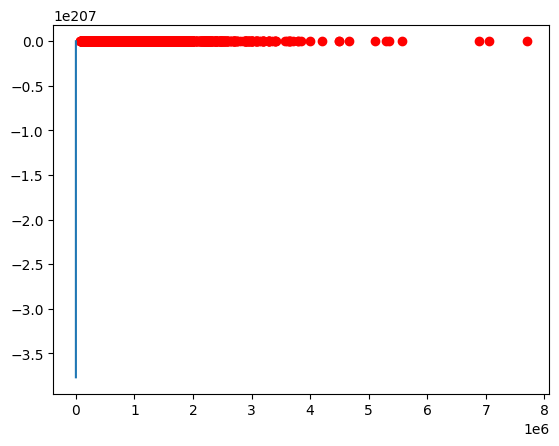

In [120]:
xm = np.array([[0], [DATASET_X_LIM]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))
ym = xmr @ tf

plt.plot(Xr[:, 1], y, 'ro')
plt.plot(xm, ym)
plt.show()

plt.plot(costs)
plt.show()